### Setup

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Api key
from api_keys import weather_api_key

#citipy to determine city based latitude and longitude
from citipy import citipy

# Create an Output file
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180,180)

### Generate Cities List

In [2]:
# list for lat_lngs and cities
lat_lngs = []
cities = []

# Creating random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Finding the nearest city for each lat/lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if it is the first time the city is listed, add to city list
    if city not in cities:
        cities.append(city)
        
#Print the count to make sure it is 500+
len(cities)

607

### Perform API Calls

In [3]:
# set url for API
weather_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#build query url
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

In [4]:
#create empty list for Max Temperature, longitue, latitude, humidity, cloudiness, wind speed, country, and date
max_temp_F = []
lat = []
lon = []
humidity = []
clouds = []
wind = []
country = []
date = []
city_name =[]

#Start printing log
print("Beginning Data Retrieval")
print("-------------------------------")

#create a counter to count the cities
city_count = 1

#loop through the cities and perform a data request
for city in cities:
    
    response = requests.get(query_url + city).json()
    
    time.sleep(1)
    
    #if data is found for the city
    try:
        max_temp_F.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        
        print(f"Processing Record {city_count} | {city}")
        
        #Change counter value
        city_count = city_count + 1
        
    #if data is not found for the city    
    except:
        print("City not found. Skipping...")
    continue
    
# End printing log
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | qaanaaq
Processing Record 2 | cootamundra
Processing Record 3 | rikitea
Processing Record 4 | sao jose da coroa grande
Processing Record 5 | tubuala
Processing Record 6 | punta arenas
Processing Record 7 | ushuaia
City not found. Skipping...
Processing Record 8 | pesnica pri mariboru
Processing Record 9 | bowen
Processing Record 10 | bluff
Processing Record 11 | salalah
Processing Record 12 | puerto colombia
Processing Record 13 | luderitz
Processing Record 14 | hermanus
Processing Record 15 | atuona
Processing Record 16 | haines junction
Processing Record 17 | bredasdorp
Processing Record 18 | barrow
Processing Record 19 | hobart
Processing Record 20 | karratha
Processing Record 21 | tuktoyaktuk
Processing Record 22 | busselton
Processing Record 23 | fergus falls
Processing Record 24 | port lincoln
Processing Record 25 | balestrand
Processing Record 26 | bethel
Processing Record 27 | airai
Processing Record

City not found. Skipping...
Processing Record 229 | mastic beach
Processing Record 230 | mazeikiai
Processing Record 231 | poli
Processing Record 232 | podyuga
Processing Record 233 | fortuna
Processing Record 234 | paamiut
Processing Record 235 | pietermaritzburg
Processing Record 236 | pimentel
Processing Record 237 | adrar
Processing Record 238 | severo-kurilsk
Processing Record 239 | neiafu
Processing Record 240 | todos santos
Processing Record 241 | birjand
Processing Record 242 | leningradskiy
Processing Record 243 | umba
City not found. Skipping...
Processing Record 244 | santiago del estero
Processing Record 245 | havelock
Processing Record 246 | nushki
Processing Record 247 | sibolga
Processing Record 248 | yinchuan
Processing Record 249 | alofi
City not found. Skipping...
Processing Record 250 | fort nelson
Processing Record 251 | sorland
Processing Record 252 | kruisfontein
Processing Record 253 | nagato
Processing Record 254 | arandas
Processing Record 255 | faanui
Processi

Processing Record 457 | reconquista
Processing Record 458 | chihuahua
Processing Record 459 | sovetskiy
Processing Record 460 | saint-pierre
Processing Record 461 | chateau-thierry
Processing Record 462 | kudahuvadhoo
Processing Record 463 | khash
Processing Record 464 | ixtapa
Processing Record 465 | iquique
Processing Record 466 | coroata
Processing Record 467 | formosa
City not found. Skipping...
Processing Record 468 | sedan
Processing Record 469 | zlobin
Processing Record 470 | sale
Processing Record 471 | dasoguz
Processing Record 472 | jinchang
Processing Record 473 | lipari
Processing Record 474 | tarakan
Processing Record 475 | naryan-mar
Processing Record 476 | wuchi
Processing Record 477 | manavalakurichi
Processing Record 478 | kitaibaraki
Processing Record 479 | karonga
Processing Record 480 | pathardi
Processing Record 481 | fuling
Processing Record 482 | fare
Processing Record 483 | viedma
Processing Record 484 | beaverlodge
Processing Record 485 | matagami
Processing Re

###  Convert Raw Data to DataFrame

In [5]:
#creating dataframe with data from API
weather_data_df = pd.DataFrame({"City": city_name, "Latitude": lat, "Longitude": lon,
                                "Max Temperature (F)": max_temp_F, "Humidity": humidity, "Cloudiness": clouds,
                                "Wind Speed (mph)": wind, "Country": country, "Date": date})
weather_data_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Qaanaaq,77.4840,-69.3632,42.87,69,100,13.02,GL,1660426667
1,Cootamundra,-34.6500,148.0333,43.11,95,100,7.36,AU,1660426967
2,Rikitea,-23.1203,-134.9692,72.91,79,49,22.21,PF,1660426829
3,São José da Coroa Grande,-8.8978,-35.1478,74.62,70,75,13.27,BR,1660426970
4,Tubualá,9.5167,-79.0333,81.37,78,100,1.05,PA,1660426972


In [6]:
#summary stats to see the count of the cities (need 500+)
weather_data_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph),Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.234619,16.988175,68.243148,71.601073,55.733453,7.924079,1.660427e+09
std,34.030966,89.583764,14.085303,20.042162,39.122299,5.316858,3.119168e+02
min,-54.800000,-179.166700,33.350000,1.000000,0.000000,0.000000,1.660427e+09
25%,-8.598450,-65.407400,56.955000,62.000000,13.000000,3.800000,1.660427e+09
50%,22.616300,22.636700,71.380000,76.000000,67.000000,6.910000,1.660427e+09
75%,47.820250,92.970400,78.575000,87.000000,97.000000,11.120000,1.660428e+09
max,78.218600,179.316700,102.650000,100.000000,100.000000,30.180000,1.660428e+09


In [7]:
#save data to csv
weather_data_df.to_csv("Outputs/weather_data.csv", index=False, header=True)

### Inspect the data and remove cities where humidity > 100%

In [8]:
#check to see if there are any cities with humidity>100
too_high_humidity = weather_data_df.loc[weather_data_df["Humidity"] > 100]
too_high_humidity.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph),Country,Date


### Plotting the Data

#### Latitude vs. Temperature (F)

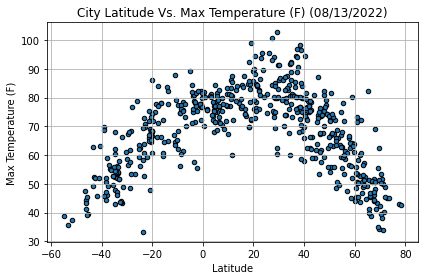

In [9]:
#Create scatter plot
weather_data_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid = True, 
                     title = "City Latitude Vs. Max Temperature (F) (08/13/2022)", edgecolors = "black")

plt.tight_layout()
plt.savefig("Outputs/Weather Data Scatter Plots/temp_v_lat")
plt.show()

In this scatter plot we are comparing the max temperature in each city with were it is on the planet based on latitude. What we can see from this graph is that from -60 to 20 degrees latitude the max temp increase, hitting its peak and then fall from 20 to 80 degrees latitude.

#### Latitude vs. Humidity

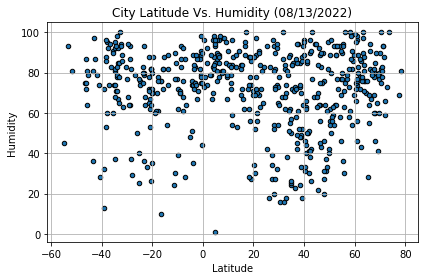

In [10]:
#Create scatter plot
weather_data_df.plot(kind="scatter", x="Latitude", y="Humidity", grid = True, 
                     title = "City Latitude Vs. Humidity (08/13/2022)", edgecolors = "black")

plt.tight_layout()
plt.savefig("Outputs/Weather Data Scatter Plots/humidity_v_lat")
plt.show()

In this scatter plot we are comparing the humidity percent for each city based on its latitude. From this plot we can see that data is very spread out and it is hard to easily see a trend, if there is any.

#### Latitude vs. Cloudiness

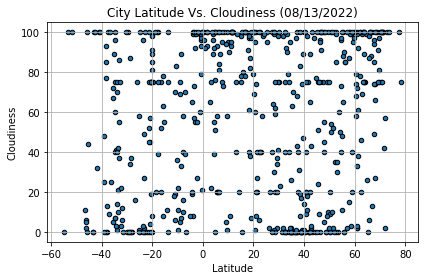

In [11]:
#Create scatter plot
weather_data_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid = True, 
                     title = "City Latitude Vs. Cloudiness (08/13/2022)", edgecolors = "black")

plt.tight_layout()
plt.savefig("Outputs/Weather Data Scatter Plots/clouds_v_lat")
plt.show()

In this plot we are comparing the cloudiness percent of each city base on its latitude. Just like before this plot show that the data is very spread out and it is hard to see any trends, if any.

#### Latitude vs. Wind Speed

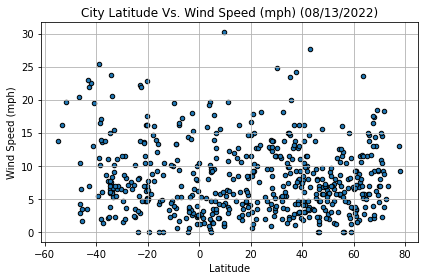

In [12]:
#Create scatter plot
weather_data_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid = True, 
                     title = "City Latitude Vs. Wind Speed (mph) (08/13/2022)", edgecolors = "black")

plt.tight_layout()
plt.savefig("Outputs/Weather Data Scatter Plots/wind_v_lat")
plt.show()

In this last plot we are compairng the wind speeds in miles per hour for each city based on its latitude. Like the previous two scatter plots it is difficult to see if there is a common trend due to the data being spread out.

### Linear Regression

In [40]:
# creating a dataframe for the northern hemisphere
northern_df = weather_data_df.loc[weather_data_df["Latitude"]>=0]

#createing a dataframe for the southern hemisphere
southern_df = weather_data_df.loc[weather_data_df["Latitude"]<0]

#### Northern Hemisphere - Max Temp vs. Laitude

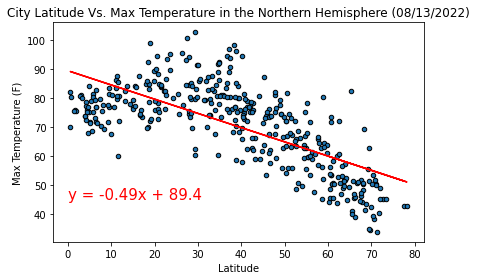

The r-squared value is: 0.4901401401004455


In [14]:
#creating regression line
(slope_ntemp, intercept_ntemp, rvalue_ntemp, pvalue_ntemp ,stderr_ntemp) = linregress(northern_df["Latitude"], 
                                                                                      northern_df["Max Temperature (F)"])

regress_value_ntemp = northern_df["Latitude"] * slope_ntemp + intercept_ntemp

line_eqn_ntemp = "y = " + str(round(slope_ntemp,2)) + "x + " + str(round(intercept_ntemp,2))

#Create scatter plot
northern_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", 
                 title = "City Latitude Vs. Max Temperature in the Northern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(northern_df["Latitude"], regress_value_ntemp, "r-")
plt.annotate(line_eqn_ntemp, (0,45), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Northern Hemisphere Linear Regressions/north_temp_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_ntemp**2}')

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

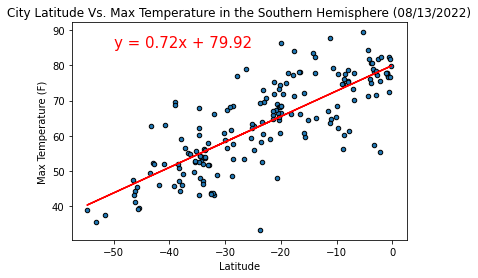

The r-squared value is: 0.6202127140547692


In [41]:
#creating regression line
(slope_stemp, intercept_stemp, rvalue_stemp, pvalue_stemp ,stderr_stemp) = linregress(southern_df["Latitude"], 
                                                                                      southern_df["Max Temperature (F)"])

regress_value_stemp = southern_df["Latitude"] * slope_stemp + intercept_stemp

line_eqn_stemp = "y = " + str(round(slope_stemp,2)) + "x + " + str(round(intercept_stemp,2))

#Create scatter plot
southern_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", 
                 title = "City Latitude Vs. Max Temperature in the Southern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(southern_df["Latitude"], regress_value_stemp, "r-")
plt.annotate(line_eqn_stemp, (-50,85), fontsize = 15, color = "red")


plt.savefig("Outputs/Southern Hemisphere Linear Regressions/south_temp_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_stemp**2}')

We are trying to see if there is any relationships we can see between a city's latiude and there max temp in the two plots seen above. The Northern Hemisphere's linear regression shows that as the latiude increases, the max temp decreases but that is not the whole story. From about 0 to 20 degress latitude the max temp is increasing, then from 20 to 80 degrees latitude the max temp decreases. Because of this the linear regression is not the best fit for this data and a different regression line would be better.

The Southern Hemisphere's linear regression shows that as the latitude increases the max temp increases. This tells the story of the data very well. The r-squared vaule helps to back this up (0.62). For the Southern Hemisphere, the linear regression would be a good tool to make a prediction.

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

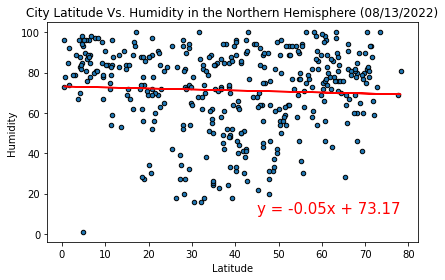

The r-squared value is: 0.002401942366217022


In [16]:
#creating regression line
(slope_nhumidity, intercept_nhumidity, rvalue_nhumidity, pvalue_nhumidity ,stderr_nhumidity) = linregress(northern_df["Latitude"],
                                                                                                          northern_df["Humidity"])

regress_value_nhumidity = northern_df["Latitude"] * slope_nhumidity + intercept_nhumidity

line_eqn_nhumidity = "y = " + str(round(slope_nhumidity,2)) + "x + " + str(round(intercept_nhumidity,2))

#Create scatter plot
northern_df.plot(kind="scatter", x="Latitude", y="Humidity", 
                 title = "City Latitude Vs. Humidity in the Northern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(northern_df["Latitude"], regress_value_nhumidity, "r-")
plt.annotate(line_eqn_nhumidity, (45,10), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Northern Hemisphere Linear Regressions/north_humidity_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_nhumidity**2}')

#### Southern Hemisphere - Humidity (%) vs. Latitude

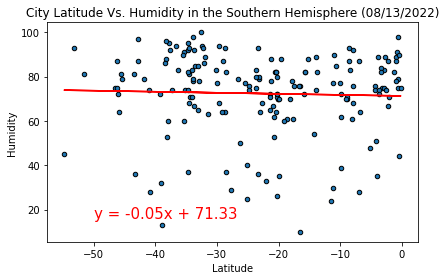

The r-squared value is: 0.0012518537069525011


In [42]:
#creating regression line
(slope_shumidity, intercept_shumidity, rvalue_shumidity, pvalue_shumidity ,stderr_shumidity) = linregress(southern_df["Latitude"],
                                                                                                          southern_df["Humidity"])

regress_value_shumidity = southern_df["Latitude"] * slope_shumidity + intercept_shumidity

line_eqn_shumidity = "y = " + str(round(slope_shumidity,2)) + "x + " + str(round(intercept_shumidity,2))

#Create scatter plot
southern_df.plot(kind="scatter", x="Latitude", y="Humidity", 
                 title = "City Latitude Vs. Humidity in the Southern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(southern_df["Latitude"], regress_value_shumidity, "r-")
plt.annotate(line_eqn_shumidity, (-50,16), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Southern Hemisphere Linear Regressions/south_humidity_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_shumidity**2}')

The two plots above are trying to see if there is any relationships between the city's latitude and the humidity percent. Looking at both the Northern Hemisphere and the Southern Hemisphere's linear regressions, there is not much there to show a relationship. The data is very spread out and the linear regression is not a good fit to show a realtionship. The r-squared value for the Northern Hemisphere (0.002) and the Southern Hemisphere (0.001) back this up.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

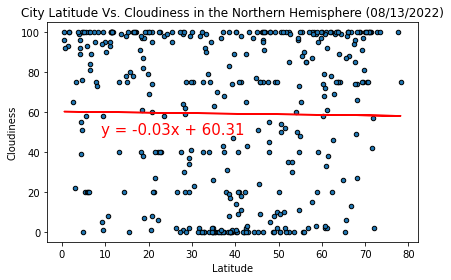

The r-squared value is: 0.00020252809367520057


In [30]:
#creating regression line
(slope_nclouds, intercept_nclouds, rvalue_nclouds, pvalue_nclouds ,stderr_nclouds) = linregress(northern_df["Latitude"],
                                                                                                northern_df["Cloudiness"])

regress_value_nclouds = northern_df["Latitude"] * slope_nclouds + intercept_nclouds

line_eqn_nclouds = "y = " + str(round(slope_nclouds,2)) + "x + " + str(round(intercept_nclouds,2))

#Create scatter plot
northern_df.plot(kind="scatter", x="Latitude", y="Cloudiness", 
                 title = "City Latitude Vs. Cloudiness in the Northern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(northern_df["Latitude"], regress_value_nclouds, "r-")
plt.annotate(line_eqn_nclouds, (9,49), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Northern Hemisphere Linear Regressions/north_clouds_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_nclouds**2}')

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

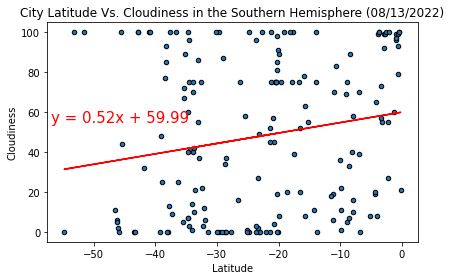

The r-squared value is: 0.035509258918429376


In [45]:
#creating regression line
(slope_sclouds, intercept_sclouds, rvalue_sclouds, pvalue_sclouds ,stderr_sclouds) = linregress(southern_df["Latitude"],
                                                                                                southern_df["Cloudiness"])

regress_value_sclouds = southern_df["Latitude"] * slope_sclouds + intercept_sclouds

line_eqn_sclouds = "y = " + str(round(slope_sclouds,2)) + "x + " + str(round(intercept_sclouds,2))

#Create scatter plot
southern_df.plot(kind="scatter", x="Latitude", y="Cloudiness", 
                 title = "City Latitude Vs. Cloudiness in the Southern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(southern_df["Latitude"], regress_value_sclouds, "r-")
plt.annotate(line_eqn_sclouds, (-57,55), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Southern Hemisphere Linear Regressions/south_clouds_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_sclouds**2}')

The two plots above are trying to show a relationship between a city's latitude and the cloudiness percent. In both the Northern Hemisphere and the Southern Hemisphere, we once again don't do much to show that their is any relationship between latitude and cloudinees. The data for both plots is very spread out the linear regressions are not doing a good job telling the story. Both r-squared values again are very low (Northern: 0.0002, Southern: 0.04) showing againg the linear regression is not a good fit.

One observation I have made looking at the two different plots is that in the Northern Hemisphere, while the data is spread out, there are large clumps accross the latitudes that have 100% cloudiness. The same can be said for 0% cloudiness. This is not seen in the Southern Hemisphere, at least not in as large as clumps as the Northern Hemisphere.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

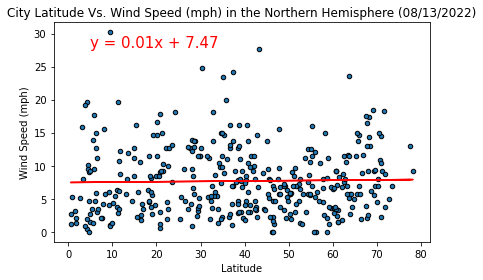

The r-squared value is: 0.0005091432289282671


In [20]:
#creating regression line
(slope_nwind, intercept_nwind, rvalue_nwind, pvalue_nwind ,stderr_nwind) = linregress(northern_df["Latitude"],
                                                                                      northern_df["Wind Speed (mph)"])

regress_value_nwind = northern_df["Latitude"] * slope_nwind + intercept_nwind

line_eqn_nwind = "y = " + str(round(slope_nwind,2)) + "x + " + str(round(intercept_nwind,2))

#Create scatter plot
northern_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", 
                 title = "City Latitude Vs. Wind Speed (mph) in the Northern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(northern_df["Latitude"], regress_value_nwind, "r-")
plt.annotate(line_eqn_nwind, (5,28), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Northern Hemisphere Linear Regressions/north_wind_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_nwind**2}')

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

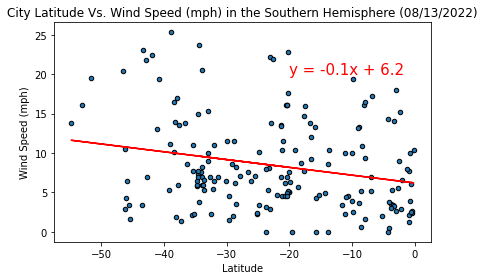

The r-squared value is: 0.05519794830258503


In [44]:
#creating regression line
(slope_swind, intercept_swind, rvalue_swind, pvalue_swind ,stderr_swind) = linregress(southern_df["Latitude"],
                                                                                      southern_df["Wind Speed (mph)"])

regress_value_swind = southern_df["Latitude"] * slope_swind + intercept_swind

line_eqn_swind = "y = " + str(round(slope_swind,2)) + "x + " + str(round(intercept_swind,2))

#Create scatter plot
southern_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", 
                 title = "City Latitude Vs. Wind Speed (mph) in the Southern Hemisphere (08/13/2022)", edgecolors = "black")

# add regression line to plot
plt.plot(southern_df["Latitude"], regress_value_swind, "r-")
plt.annotate(line_eqn_swind, (-20,20), fontsize = 15, color = "red")

plt.tight_layout()
plt.savefig("Outputs/Southern Hemisphere Linear Regressions/south_wind_v_lat")
plt.show()

print(f'The r-squared value is: {rvalue_swind**2}')

The last two plots are trying to see if there is a relationship between a city's latiude and the wind speed. Again, with both the Northern Hemisphere and Southern Hemisphere's data being so spread out and the r-squared values being so low (Northern: 0.0005, Southern: 0.06) a linear regression is not the best tool to find a realtionship, if any.

Looking at the Northern Hemisphere data, while still being spread out along the latitudes, most of the data seems to fall between 0 and 15 mph. You can see this in the flatness in the linear regression line. The Southern Hemisphere's data is more spread out then the Northern Hemisphere. Looking at the Southern Hemisphere's linear regression line is has a steeper line comapared to the Nothern Hemisphere.